# Assignment 1

In [143]:
import math
import matplotlib.pyplot as plt
from Library_1 import *



### Question 1 - Solve $\exp(−x) − x = 0$ using fixed-point method, accurate up to 4 places in decimal.

In [144]:
# Define the function g(x), this has to be input by the user
def g(x):
    return math.exp(-x)

initial_guess = 1.0
eps=1e-6

root, iterations = fixed_point_method(g, initial_guess, eps)

print(f"Root of the given equation: {root}")
print(f"Number of iterations performed: {iterations}")


Root of the given equation: 0.5671430308342419
Number of iterations performed: 25


### Question 2 - Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal.
$$ \int^1_0 \sqrt{1+x^4} dx $$


In [145]:
# SIMPSON'S RULE

# Define the function f(x), this has to be input by the user
def f(x):
    return math.sqrt(1 + x**4)

a = 0
b = 1
eps = 1e-8

integral_simpson = int_simpson(f, a, b, eps)
print(f"Value of the integral by Simpson's rule: {integral_simpson}")


Value of the integral by Simpson's rule: 1.0894294132234008


In [ ]:
# GAUSSIAN QUADRATURE

# integral_gauss = int_gaussian(f, a, b, eps)
# print(f"Value of the integral by Gaussian quadrature: {integral_gauss}")


### Question 3 - Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01. Tabulate your results.
$$ y' = \dfrac{5x^2-y}{\exp(x+y)} \quad \text{and} \quad y(0)=1.0$$


In [159]:
def dydx(x, y):
    return (5*x**2-y)/(math.exp(x+y))

x0 = 0.0
y0 = 1.0
xn = 5.0

h1 = 0.5
h2 = 0.2
h3 = 0.05
h4 = 0.01

X1, Y1 = ODE_1D_RK4(dydx, y0, x0, xn, h1)
X2, Y2 = ODE_1D_RK4(dydx, y0, x0, xn, h2)
X3, Y3 = ODE_1D_RK4(dydx, y0, x0, xn, h3)
X4, Y4 = ODE_1D_RK4(dydx, y0, x0, xn, h4)


In [163]:
# Print the results
print("X1      Y1")
for i in range(len(X1)):
    print(f"{X1[i]:.2f}    {Y1[i]:.4f}")
print()

print("X2      Y2")
for i in range(len(X2)):
    print(f"{X2[i]:.2f}    {Y2[i]:.4f}")
print()

print("X3      Y3")
for i in range(len(X3)):
    print(f"{X3[i]:.2f}    {Y3[i]:.4f}")
print()

print("X4      Y4")
for i in range(len(X4)):
    print(f"{X4[i]:.2f}    {Y4[i]:.4f}")
print()


X1      Y1
0.00    1.0000
0.50    0.9132
1.00    1.0719
1.50    1.3498
2.00    1.6191
2.50    1.8382
3.00    2.0055
3.50    2.1298
4.00    2.2208
4.50    2.2868
5.00    2.3343

X2      Y2
0.00    1.0000
0.20    0.9378
0.40    0.9104
0.60    0.9267
0.80    0.9838
1.00    1.0716
1.20    1.1778
1.40    1.2920
1.60    1.4064
1.80    1.5162
2.00    1.6189
2.20    1.7131
2.40    1.7986
2.60    1.8754
2.80    1.9442
3.00    2.0053
3.20    2.0596
3.40    2.1077
3.60    2.1502
3.80    2.1876
4.00    2.2206
4.20    2.2497
4.40    2.2751
4.60    2.2975
4.80    2.3171
5.00    2.3342

X3      Y3
0.00    1.0000
0.05    0.9821
0.10    0.9656
0.15    0.9507
0.20    0.9378
0.25    0.9271
0.30    0.9189
0.35    0.9133
0.40    0.9104
0.45    0.9104
0.50    0.9131
0.55    0.9185
0.60    0.9267
0.65    0.9375
0.70    0.9507
0.75    0.9662
0.80    0.9838
0.85    1.0034
0.90    1.0246
0.95    1.0474
1.00    1.0716
1.05    1.0969
1.10    1.1231
1.15    1.1502
1.20    1.1778
1.25    1.2060
1.30    1.2344
1.35 

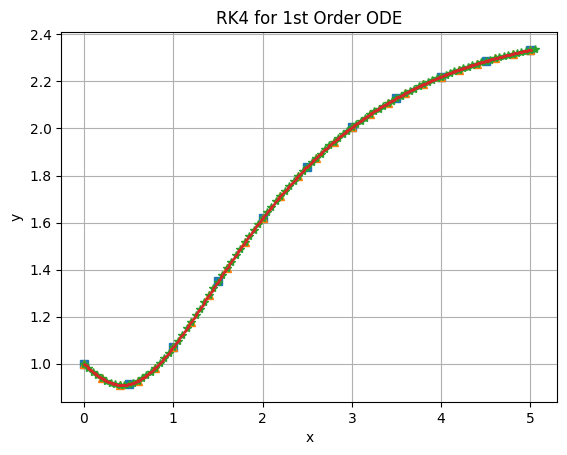

In [155]:
# Plotting the results
plt.plot(X1, Y1, 's', label='h=0.5')
plt.plot(X2, Y2, '^', label='h=0.2')
plt.plot(X3, Y3, '*', label='h=0.05')
plt.plot(X4, Y4, '.', label='h=0.01', markersize=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('RK4 for 1st Order ODE')
plt.grid()
plt.show()


### Question 4 - Solve the heat equation $u_t = 4u_{xx}$, using Crank-Nicolson and your choice of $\alpha$, subjected to the boundary conditions
$$ u(0, t) = 0 = u(8, t) \quad \text{and} \quad x(x, 0) = 4x − \dfrac{x^2}{2} $$
### Since matrix inversion is not taught in class, you may use ready-made available routines for the purpose. Comment on your choice of α and inversion algorithm. Display the solution both in a table and a contour plot.



### Question 5 - Solve the Poisson’s equation $u_{xx} + u_{yy} = xe^y$ in a $6^2$ grid with boundary conditions
$$ u(0, y) = 0 \quad \text{and} \quad u(2, y) = 2e^y $$
$$ u(x, 0) = x \quad \text{and} \quad u(x, 1) = xe $$
### Display the solution both in a table and a 3-D plot.

In [164]:
"""
Heat diffusion equation solver using Cranck-Nicolson method.

Parameters:
- T0: Initial temperature profile
- L: Length of the rod
- Tl: Temperature at the left end of the rod
- Tr: Temperature at the right end of the rod
- k: Thermal conductivity
- c: Specific heat
- rho: Density
- t0: Initial time
- tn: Final time
- dt: Time step
- dx: Spatial step
- tol: Tolerance (default = 1e-6)

Returns:
- T: Temperature profile at the final time

"""

# def heat_diff_Crank_Nicholson(T0, L, Tl, Tr, k, c, rho, t0, tn, dt, dx, tol=1e-6):


IndexError: list index out of range